 22.05.2017 al el 25.05.2017

In [3]:
import pandas as pd
import tools
from datetime import datetime
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import datetime as dt

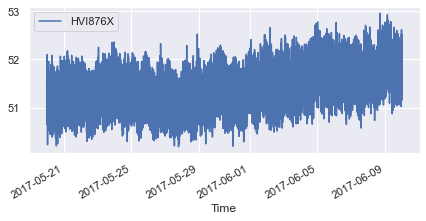

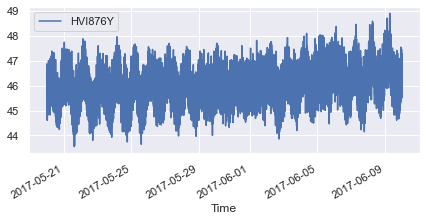

In [11]:
df_1 = pd.read_csv(r'..\data\untouched_data\mot_electric\2017\HVI876X.csv', sep=';')
df_2 = pd.read_csv(r'..\data\untouched_data\mot_electric\2017\HVI876Y.csv', sep=';')
df_1['Time'] = pd.to_datetime(df_1['Time'], format=tools.date_format_2)
df_2['Time'] = pd.to_datetime(df_2['Time'], format=tools.date_format)
splits = ['20/05/2017','30/05/2017','10/06/2017']
d_1 = datetime.strptime(splits[0], "%d/%m/%Y")
d_2 = datetime.strptime(splits[2], "%d/%m/%Y")
df_1 = df_1.set_index('Time').sort_index()[d_1:d_2]
df_2 = df_2.set_index('Time').sort_index()[d_1:d_2]
tools.plot_df(df_1)
tools.plot_df(df_2)

Train starts at 2017-05-20 00:00:00 and ends at 2017-05-29 23:58:00
Test starts at 2017-05-30 00:01:00 and ends at 2017-06-09 23:59:00


Text(0, 0.5, 'Mahalanobis distance')

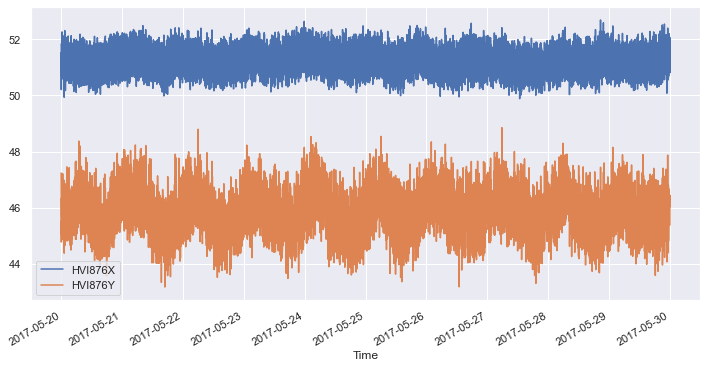

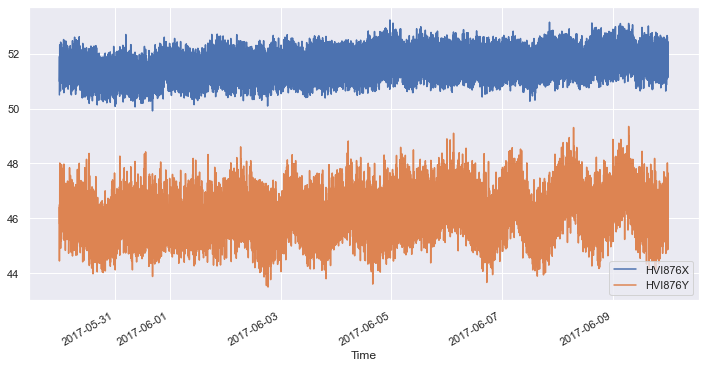

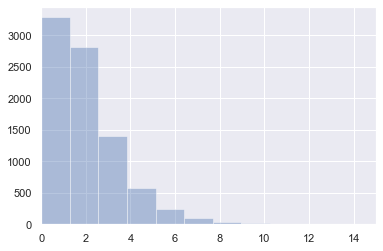

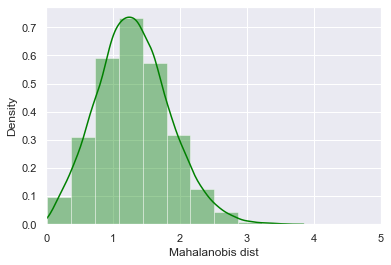

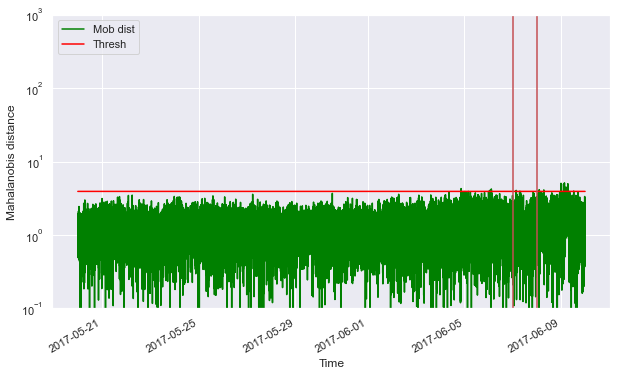

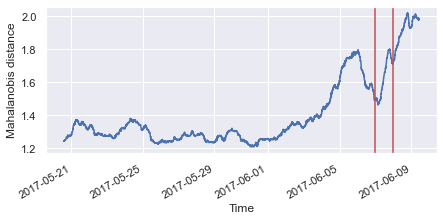

In [17]:
year = 2017 
df_list = [df_1, df_2]
dataset_train, dataset_test = tools.init_datasets_prepared(df_list, splits,resample=False, resample_time='5Min')
tools.plot_train(dataset_train)
tools.plot_train(dataset_test)
dist_test, dist_train, threshold, anomaly_alldata = tools.dists_and_anomalies(dataset_train.dropna(), dataset_test.dropna(), components=len(df_list))
tools.plot_M_distance_squared(dist_train, scale=15)
tools.plot_M_distance(dist_train)
tools.plot_anomaly_metric(anomaly_alldata)
plt.axvline(dt.datetime(2017, 6, 7), color='r')
plt.axvline(dt.datetime(2017, 6, 8), color='r')
plt.ylabel('Mahalanobis distance')
mob_dist = anomaly_alldata['Mob dist']
f,ax=plt.subplots(figsize=(7,3))
mob_dist.rolling(window=1000,center=True).median().plot(ax=ax)
plt.axvline(dt.datetime(2017, 6, 7), color='r')
plt.axvline(dt.datetime(2017, 6, 8), color='r')
plt.ylabel('Mahalanobis distance')
